## Simulating an A/B Test

Let's say that we have a webpage that we're changing the landing page to increase the clickthrough rate for new customers. 

The current click-through rate is 20%, and we want to test a new one.


Design an experiment that would help us determine the best landing page

We would need to know the sample size to do power analysis
- we need to know effect size or make an estimate

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats as ss

import seaborn as sns

import random
from statsmodels.stats.proportion import proportions_ztest

In [2]:
# creating the 2 distributions that we're sampling from

sample_size = 100000

pop_1 = []
for _ in range(sample_size):
    pop_1.append(np.random.normal(100))
    

pop_2 = []
for _ in range(sample_size):
    pop_2.append(np.random.normal(loc=102))

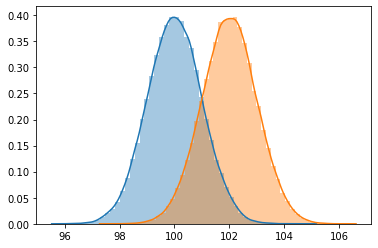

In [3]:
# what do our distrubutions look like 
sns.distplot(pop_1)
sns.distplot(pop_2)

plt.show();

# print(len(pop_1), len(pop_2))

In [8]:
# generating samples from the populations
sample_1 = []
for _ in range(100):
    sample_1.append(random.choice(pop_1))

In [9]:
sample_2 = []
for _ in range(100):
    sample_2.append(random.choice(pop_2))

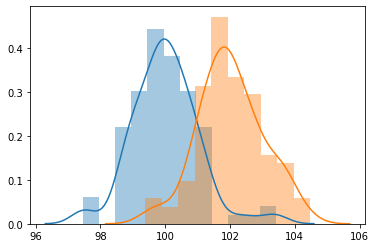

In [10]:
sns.distplot(sample_1)
sns.distplot(sample_2)

plt.show();

In [12]:
# note it assumes equal variance between the two samples, and should be stated otherwise

# pass in the arrays into the function
t, p_value = stats.ttest_ind(sample_1, sample_2)
print(t, p_value)

-14.06600924485732 1.304798762131039e-31


In [ ]:
stats.ttest_ind_from_stats() # if we just use summary statistics as inputs instead of the values

In [13]:
# what if we sample from the same population? 

# what is the probability of finding a false positive?

# i want to do 100 simulations of samples from the population
num_simulations = 100
all_sample_1 = []
all_sample_2 = []
for _ in range(num_simulations):
    sample_1 = []
    sample_2 = []
    for _ in range(num_simulations):
        sample_1.append(random.choice(pop_1))
        sample_2.append(random.choice(pop_1))
    all_sample_1.append(sample_1)
    all_sample_2.append(sample_2)

In [14]:
samples = pd.DataFrame()
samples['sample_1'] = all_sample_1
samples['sample_2'] = all_sample_2

In [20]:
samples['t_test_results']=samples.apply(lambda x: stats.ttest_ind(x['sample_1'], x['sample_2']), axis=1)

In [21]:
samples.head()

,sample_1,sample_2,t_test_results
0,"[99.4362212428614, 99.65053541361874, 101.1597...","[100.73961881775898, 100.23887309815105, 100.3...","(-0.20052613966150695, 0.8412749385417397)"
1,"[100.35298858874206, 100.08684301042693, 99.75...","[102.40381885517702, 100.09496568363342, 100.4...","(-1.2742001001991947, 0.20408601580674846)"
2,"[100.65117494691938, 99.40107610310908, 99.801...","[100.06690172733533, 99.44805428135037, 100.11...","(-1.80106795737753, 0.07321379650857046)"
3,"[97.8839505878649, 99.35549481159946, 99.90823...","[100.18619850365121, 99.13743228744666, 100.84...","(-0.02170137127052439, 0.9827080237776529)"
4,"[100.41144012649919, 100.97099693938999, 100.1...","[98.73963485894275, 100.38654876731825, 99.586...","(-0.14858881686392333, 0.8820293184342125)"


In [23]:
samples[['t_value', 'p_value']] = pd.DataFrame(samples['t_test_results'].tolist())

In [35]:
samples['significant'] = samples.p_value.map(lambda x: True if x < 0.05 else False)

In [36]:
samples['significant'].value_counts()

False    95
True      5
Name: significant, dtype: int64

## demonstrating power



In [61]:
power_samples = pd.DataFrame()

all_sample_1 = []
all_sample_2 = []
for _ in range(1000):
    sample_1 = []
    sample_2 = []
    for _ in range (100):
        sample_1.append(random.choice(pop_1))
        sample_2.append(random.choice(pop_2))
    all_sample_1.append(sample_1)
    all_sample_2.append(sample_2)

In [62]:
power_samples['sample_1'] = all_sample_1
power_samples['sample_2'] = all_sample_2

power_samples['t_test'] = power_samples.apply(lambda x: stats.ttest_ind(x['sample_1'], x['sample_2']), axis=1)

In [63]:
power_samples[['statistic', 'p_value']] = pd.DataFrame(power_samples['t_test'].tolist())
power_samples['significant'] = power_samples.p_value.map(lambda x: True if x < 0.05 else False)

In [64]:
power_samples.head()

,sample_1,sample_2,t_test,statistic,p_value,significant
0,"[99.17036694014121, 100.4113641534821, 99.7517...","[102.8421563700786, 102.07919533379757, 102.68...","(-14.825700897419726, 6.087345493825213e-34)",-14.825701,6.087345e-34,True
1,"[99.97286506318572, 98.88634645072689, 99.9247...","[100.7591471554346, 102.0248514758478, 101.850...","(-14.102621057385566, 1.0072147718543993e-31)",-14.102621,1.007215e-31,True
2,"[100.49296982592077, 99.25175585435036, 99.224...","[103.78755909550054, 103.31800229622543, 103.2...","(-15.302551112209878, 2.1112668430588963e-35)",-15.302551,2.111267e-35,True
3,"[101.74946812932522, 99.17611408073547, 99.279...","[103.44011767438887, 101.88545511384247, 102.0...","(-14.403573560460812, 1.2000664950082988e-32)",-14.403574,1.200066e-32,True
4,"[99.5778585468929, 99.82441274288404, 100.5905...","[100.86082525640379, 101.6638743093077, 101.24...","(-15.47982156458095, 6.064900106632878e-36)",-15.479822,6.064900e-36,True


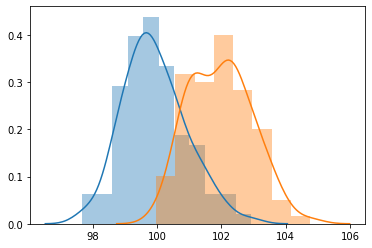

In [71]:
sns.distplot(power_samples.sample_1[0])
sns.distplot(power_samples.sample_2[0])

In [65]:
power_samples.significant.value_counts()

True    1000
Name: significant, dtype: int64

In [75]:
pop_1_std = np.std(pop_1)
print(pop_1_std)

t_critical = ss.t.isf(.05, 99)

np.mean(pop_1) + t_critical*(pop_1_std / np.sqrt(99))

0.996620950650983


100.17150025950389

In [72]:
ss.t.isf(.05, 99) # to get the critical value

1.6603911559963902

### Power Analysis

How do we know that we have enough samples to detect the differences between the two populations?

In [38]:
false_positive_rate = 0.05 # probability of finding something interesting
false_negative_rate = 0.2 # probability of saying theres nothing there when there really is

power = 1 - false_negative_rate

In [37]:
samples['significant'].crosstab()

AttributeError: 'Series' object has no attribute 'crosstab'